In [ ]:
#### import sys 
sys.path.append("..") 
import os

import numpy as np
from braiding_model import BraidOperator, show_braid_words
from braiding_model import GeneratorBraid, obtain_model_braid, obtain_model_torus_knot
from braiding_model import sigma_z, sigma_x, sigma_y, sigma_0
from braiding_model import PerturbationModel
from braiding_model import HamiltonianEffective, NonHamiltonianModelFinite

from machine_learning import Classifier, Cluster
from topology import topology_comparator, similarity_function
from functools import partial

import matplotlib.pyplot as plt
import itertools

p1 = PerturbationModel()
p1.set_parameters(t1=0.1,t2=0.0)

p2 = PerturbationModel()
p2.set_parameters(t1=-0.1,t2=0.0)

p3 = PerturbationModel()
p3.set_parameters(t1=0.1,t2=0.1)

p4 = PerturbationModel()
p4.set_parameters(t1=0.0,t2=-0.1)

perturbations = [p1,p2,p3,p4]

np.seterr(all="ignore") # ignore some numerical errors

# test

Winding number:  -3.0
The degeneracy:  3.0


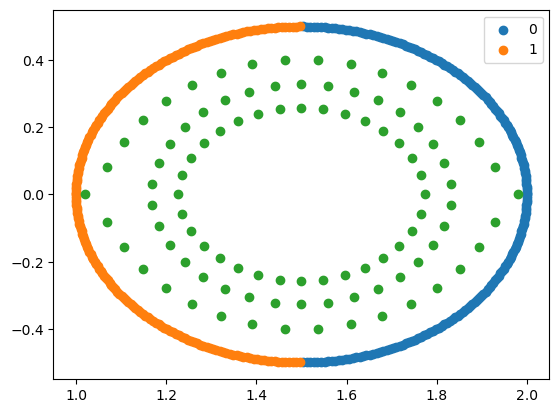

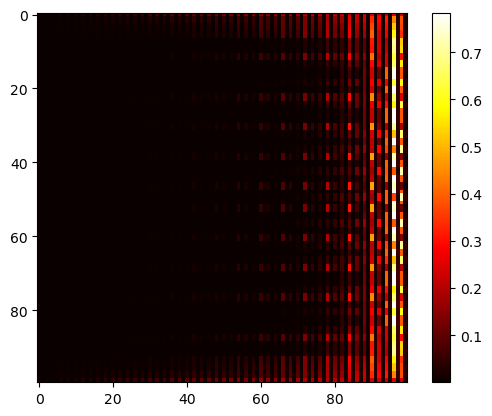

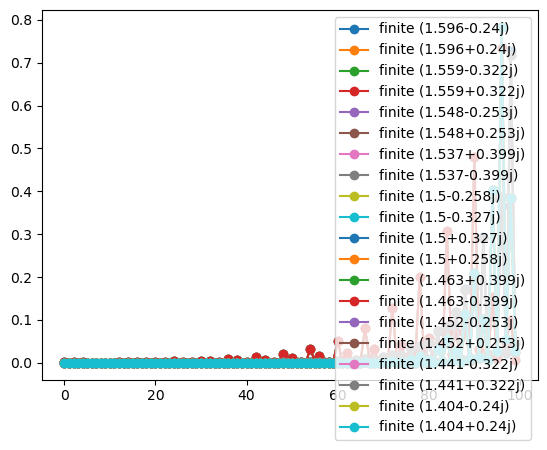

In [70]:
n_band = 2
braid_operators = [BraidOperator(1), BraidOperator(1), BraidOperator(1)]
hamiltonian_effective = HamiltonianEffective(n_band=n_band, braid_operators=braid_operators)

print("Winding number: ", hamiltonian_effective.get_winding_number(E_ref=1.5))
print("The degeneracy: ", hamiltonian_effective.get_n_degeneracy())

# ks = np.linspace(0, 2 * np.pi, 200)
# Es = np.array([hamiltonian_effective.get_energies(k) for k in ks])
# ax = plt.figure().add_subplot(projection='3d')
# for index in range(n_band):
#     x = np.real(Es[:, index])
#     y = np.imag(Es[:, index])
#     ax.scatter(x, y, ks/(np.pi), label='{0}'.format(index))
#     ax.legend()
    
# Es = np.array([hamiltonian_effective.get_energies_Fourier(k) for k in ks])
# ax = plt.figure().add_subplot(projection='3d')
# for index in range(n_band):
#     x = np.real(Es[:, index])
#     y = np.imag(Es[:, index])
#     ax.scatter(x, y, ks/(np.pi), label='{0}'.format(index))
#     ax.legend()


# Fourier_coefficients = hamiltonian_effective.get_Fourier_coefficients()

# plt.figure()
# for index in range(n_band):
#     keys = np.sort(list(Fourier_coefficients[index].keys()))
#     #keys = range(-10,11)
#     y = np.abs([Fourier_coefficients[index][key] for key in keys])
#     x = keys
#     plt.plot(x, y, '-o')
#     #plt.hist(y)
# #plt.legend()
# plt.xlim([-5,5])

#plt.show()

n_unit_cell = 50
finite_model = NonHamiltonianModelFinite(n_unit_cell=n_unit_cell, 
                                         Hamiltonian_effective=hamiltonian_effective,
                                         constant_term=0.1
                                         )
#finite_model.initiate(Hermitian_perturbation=1e-8)
value_finite, eigenvector_finite = finite_model.get_eigensystems()


ks = np.linspace(0, 2 * np.pi, 200)
Es = np.array([hamiltonian_effective.get_energies(k) for k in ks])
plt.figure()
for index in range(n_band):
    x = np.real(Es[:, index])
    y = np.imag(Es[:, index])
    plt.scatter(x, y, label='{0}'.format(index))
    plt.legend()

x = np.real(value_finite)
y = np.imag(value_finite)
plt.scatter(x, y, label='finite {0}'.format(index))
    #plt.legend(loc='left')
    

plt.figure()
plt.imshow(np.abs(eigenvector_finite),cmap='hot')
plt.colorbar()

plt.figure()
plot_list = range(40,60)
for ifield in plot_list:
    x = range(n_band*n_unit_cell)
    y = eigenvector_finite[ifield]
    plt.plot(x, np.abs(y), '-o', label='finite {0}'.format(np.round(value_finite[ifield],decimals=3)))
plt.legend()

plt.show()

# Case 1: $\sigma_1^3$

Winding number:  -3.0
The degeneracy:  3.0
Winding matrix: 
[[ 0.  -1.5]
 [-1.5  0. ]]


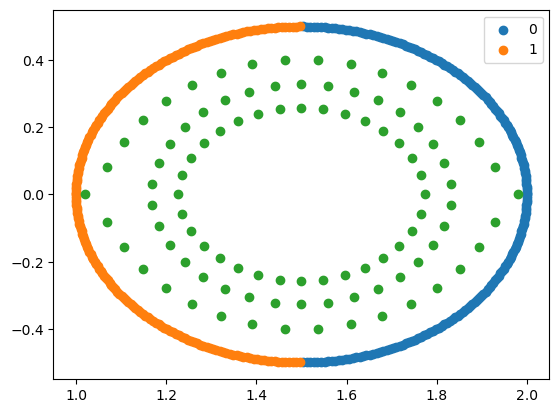

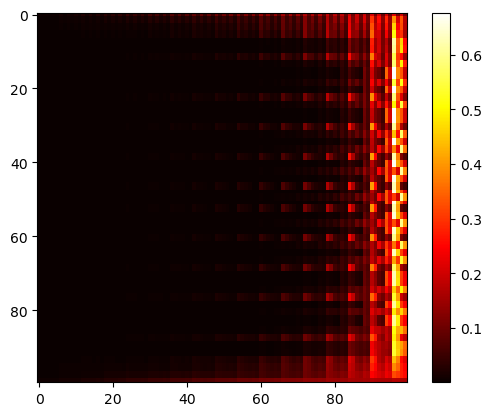

In [8]:
n_band = 2
directory_name = './figs/Bulk_edge_correspondence/Case 1/'

braid_operators = [BraidOperator(1), BraidOperator(1), BraidOperator(1)]
hamiltonian_effective = HamiltonianEffective(n_band=n_band, braid_operators=braid_operators)

print("Winding number: ", hamiltonian_effective.get_winding_number(E_ref=1.5))
print("The degeneracy: ", hamiltonian_effective.get_n_degeneracy())
print("Winding matrix: ")
print(hamiltonian_effective.get_winding_matrix())


n_unit_cell = 50
finite_model = NonHamiltonianModelFinite(n_unit_cell=n_unit_cell, 
                                         Hamiltonian_effective=hamiltonian_effective)
finite_model.initiate(Hermitian_perturbation=1e-8)
value_finite, eigenvector_finite = finite_model.get_eigensystems()

## save data
hamiltonian_effective.save_band('{directory_name}band.txt'.format(directory_name=directory_name))
_value_finite = np.zeros((len(value_finite),2))
for i, _val in enumerate(value_finite):
    _value_finite[i, 0] = np.real(_val)
    _value_finite[i, 1] = np.imag(_val)
np.savetxt('{directory_name}finite.txt'.format(directory_name=directory_name), _value_finite)
np.savetxt('{directory_name}eigenvectors_finite.txt'.format(directory_name=directory_name), np.abs(eigenvector_finite))
           
# plot
ks = np.linspace(0, 2 * np.pi, 200)
Es = np.array([hamiltonian_effective.get_energies(k) for k in ks])
plt.figure()
for index in range(n_band):
    x = np.real(Es[:, index])
    y = np.imag(Es[:, index])
    plt.scatter(x, y, label='{0}'.format(index))
    plt.legend()

x = np.real(value_finite)
y = np.imag(value_finite)
plt.scatter(x, y, label='finite {0}'.format(index))
    #plt.legend(loc='left')

plt.figure()
plt.imshow(np.abs(eigenvector_finite),cmap='hot')
plt.colorbar()

plt.show()

# Case 2: $\sigma_2 \sigma_1$

Winding number:  -1.0
The degeneracy:  2.0
Winding matrix: 
[[ 0.  -0.5 -0.5]
 [-0.5  0.   0. ]
 [-0.5  0.   0. ]]


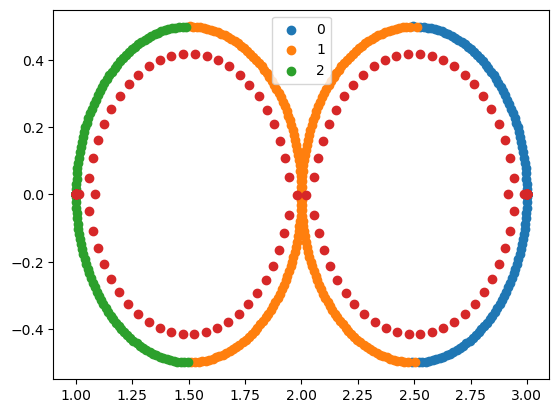

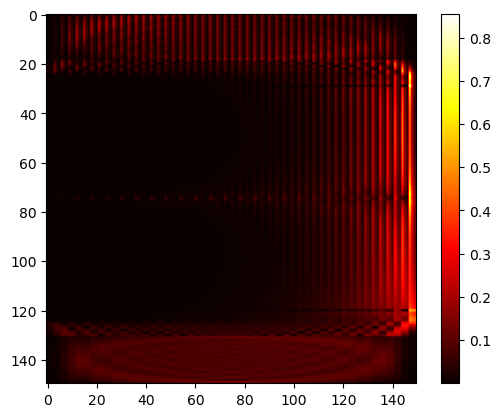

In [9]:
n_band = 3
directory_name = './figs/Bulk_edge_correspondence/Case 2/'

braid_operators = [BraidOperator(1), BraidOperator(2)]
hamiltonian_effective = HamiltonianEffective(n_band=n_band, braid_operators=braid_operators)

print("Winding number: ", hamiltonian_effective.get_winding_number(E_ref=1.5))
print("The degeneracy: ", hamiltonian_effective.get_n_degeneracy())
print("Winding matrix: ")
print(hamiltonian_effective.get_winding_matrix())



n_unit_cell = 50
finite_model = NonHamiltonianModelFinite(n_unit_cell=n_unit_cell, 
                                         Hamiltonian_effective=hamiltonian_effective)
finite_model.initiate(Hermitian_perturbation=1e-8)
value_finite, eigenvector_finite = finite_model.get_eigensystems()

## save data
hamiltonian_effective.save_band('{directory_name}band.txt'.format(directory_name=directory_name))
_value_finite = np.zeros((len(value_finite),2))
for i, _val in enumerate(value_finite):
    _value_finite[i, 0] = np.real(_val)
    _value_finite[i, 1] = np.imag(_val)
np.savetxt('{directory_name}finite.txt'.format(directory_name=directory_name), _value_finite)
np.savetxt('{directory_name}eigenvectors_finite.txt'.format(directory_name=directory_name), np.abs(eigenvector_finite))
           
# plot
ks = np.linspace(0, 2 * np.pi, 200)
Es = np.array([hamiltonian_effective.get_energies(k) for k in ks])
plt.figure()
for index in range(n_band):
    x = np.real(Es[:, index])
    y = np.imag(Es[:, index])
    plt.scatter(x, y, label='{0}'.format(index))
    plt.legend()

x = np.real(value_finite)
y = np.imag(value_finite)
plt.scatter(x, y, label='finite {0}'.format(index))
    #plt.legend(loc='left')

plt.figure()
plt.imshow(np.abs(eigenvector_finite),cmap='hot')
plt.colorbar()

plt.show()

# Case 3:  $\sigma_2^{-1}\sigma_1$

Winding number:  -1.0
The degeneracy:  2.0
Winding matrix: 
[[ 0.  -0.5  0.5]
 [-0.5  0.   0. ]
 [ 0.5  0.   0. ]]


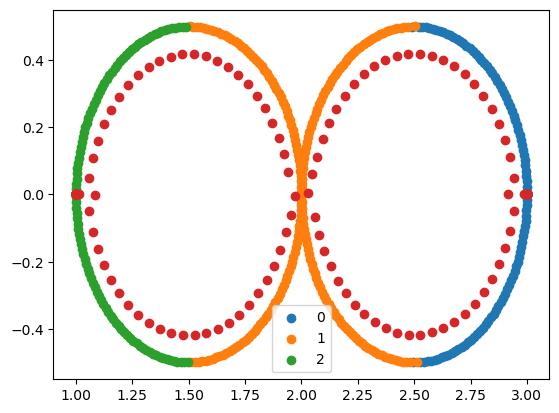

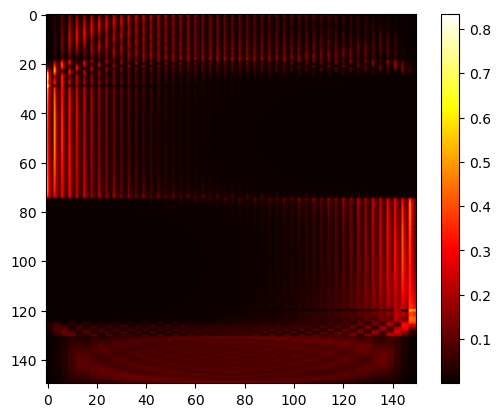

In [10]:
n_band = 3
directory_name = './figs/Bulk_edge_correspondence/Case 3/'

braid_operators = [BraidOperator(1), BraidOperator(-2)]
hamiltonian_effective = HamiltonianEffective(n_band=n_band, braid_operators=braid_operators)

print("Winding number: ", hamiltonian_effective.get_winding_number(E_ref=1.5))
print("The degeneracy: ", hamiltonian_effective.get_n_degeneracy())
print("Winding matrix: ")
print(hamiltonian_effective.get_winding_matrix())


n_unit_cell = 50
finite_model = NonHamiltonianModelFinite(n_unit_cell=n_unit_cell, 
                                         Hamiltonian_effective=hamiltonian_effective)
finite_model.initiate(Hermitian_perturbation=1e-8)
value_finite, eigenvector_finite = finite_model.get_eigensystems()

## save data
hamiltonian_effective.save_band('{directory_name}band.txt'.format(directory_name=directory_name))
_value_finite = np.zeros((len(value_finite),2))
for i, _val in enumerate(value_finite):
    _value_finite[i, 0] = np.real(_val)
    _value_finite[i, 1] = np.imag(_val)
np.savetxt('{directory_name}finite.txt'.format(directory_name=directory_name), _value_finite)
np.savetxt('{directory_name}eigenvectors_finite.txt'.format(directory_name=directory_name), np.abs(eigenvector_finite))
           
# plot
ks = np.linspace(0, 2 * np.pi, 200)
Es = np.array([hamiltonian_effective.get_energies(k) for k in ks])
plt.figure()
for index in range(n_band):
    x = np.real(Es[:, index])
    y = np.imag(Es[:, index])
    plt.scatter(x, y, label='{0}'.format(index))
    plt.legend()

x = np.real(value_finite)
y = np.imag(value_finite)
plt.scatter(x, y, label='finite {0}'.format(index))
    #plt.legend(loc='left')

plt.figure()
plt.imshow(np.abs(eigenvector_finite),cmap='hot')
plt.colorbar()

plt.show()

# Case 4: $\sigma_1^{-1} \sigma_2 \sigma_1$

Winding number:  -0.0
The degeneracy:  1.0
Winding matrix: 
[[ 0.  -0.5 -0.5]
 [-0.5  0.   0.5]
 [-0.5  0.5  0. ]]


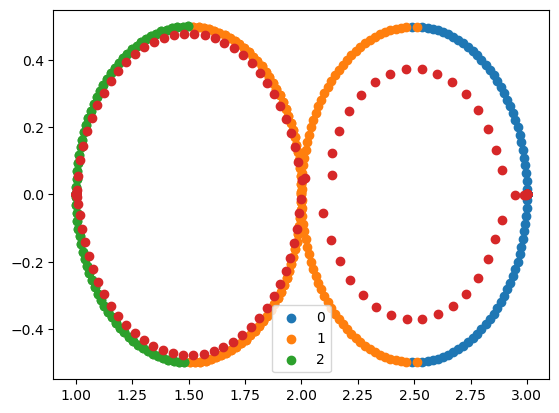

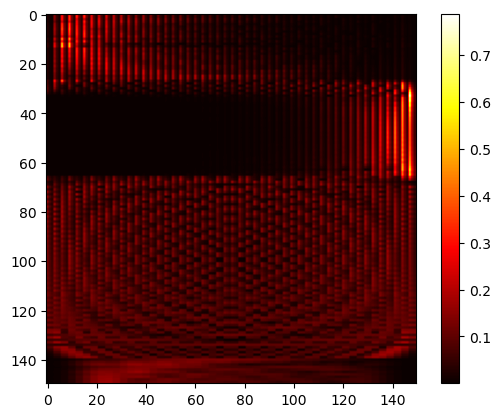

In [13]:
n_band = 3
directory_name = './figs/Bulk_edge_correspondence/Case 4/'

braid_operators = [BraidOperator(1), BraidOperator(2), BraidOperator(-1)]
hamiltonian_effective = HamiltonianEffective(n_band=n_band, braid_operators=braid_operators)

print("Winding number: ", hamiltonian_effective.get_winding_number(E_ref=1.5))
print("The degeneracy: ", hamiltonian_effective.get_n_degeneracy())
print("Winding matrix: ")
print(hamiltonian_effective.get_winding_matrix())



n_unit_cell = 50
finite_model = NonHamiltonianModelFinite(n_unit_cell=n_unit_cell, 
                                         Hamiltonian_effective=hamiltonian_effective)
finite_model.initiate(Hermitian_perturbation=1e-8)
value_finite, eigenvector_finite = finite_model.get_eigensystems()

## save data
hamiltonian_effective.save_band('{directory_name}band.txt'.format(directory_name=directory_name))
_value_finite = np.zeros((len(value_finite),2))
for i, _val in enumerate(value_finite):
    _value_finite[i, 0] = np.real(_val)
    _value_finite[i, 1] = np.imag(_val)
np.savetxt('{directory_name}finite.txt'.format(directory_name=directory_name), _value_finite)
np.savetxt('{directory_name}eigenvectors_finite.txt'.format(directory_name=directory_name), np.abs(eigenvector_finite))
           
# plot
ks = np.linspace(0, 2 * np.pi, 200)
Es = np.array([hamiltonian_effective.get_energies(k) for k in ks])
plt.figure()
for index in range(n_band):
    x = np.real(Es[:, index])
    y = np.imag(Es[:, index])
    plt.scatter(x, y, label='{0}'.format(index))
    plt.legend()

x = np.real(value_finite)
y = np.imag(value_finite)
plt.scatter(x, y, label='finite {0}'.format(index))
    #plt.legend(loc='left')

plt.figure()
plt.imshow(np.abs(eigenvector_finite),cmap='hot')
plt.colorbar()

plt.show()

# Case 5: $\sigma^{-1}_1 \sigma_3 \sigma_2^{-1} \sigma_1$

Winding number:  0.0
The degeneracy:  2.0
Winding matrix: 
[[ 0.  -0.5  0.5 -0.5]
 [-0.5  0.   0.5  0. ]
 [ 0.5  0.5  0.   0. ]
 [-0.5  0.   0.   0. ]]


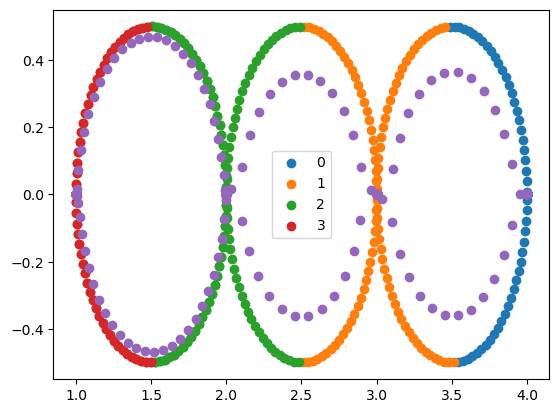

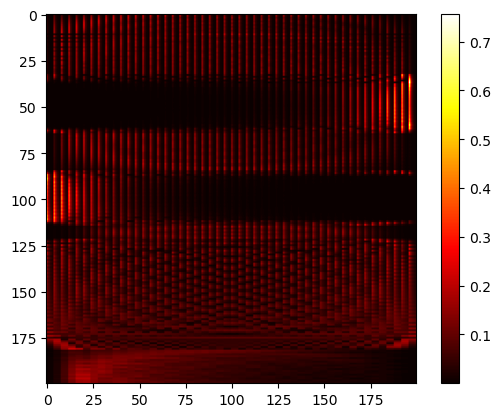

In [14]:
n_band = 4
directory_name = './figs/Bulk_edge_correspondence/Case 5/'

braid_operators = [BraidOperator(1), BraidOperator(-2), BraidOperator(3), BraidOperator(-1)]
hamiltonian_effective = HamiltonianEffective(n_band=n_band, braid_operators=braid_operators)

print("Winding number: ", hamiltonian_effective.get_winding_number(E_ref=1.5))
print("The degeneracy: ", hamiltonian_effective.get_n_degeneracy())
print("Winding matrix: ")
print(hamiltonian_effective.get_winding_matrix())



n_unit_cell = 50
finite_model = NonHamiltonianModelFinite(n_unit_cell=n_unit_cell, 
                                         Hamiltonian_effective=hamiltonian_effective)
finite_model.initiate(Hermitian_perturbation=1e-8)
value_finite, eigenvector_finite = finite_model.get_eigensystems()

## save data
hamiltonian_effective.save_band('{directory_name}band.txt'.format(directory_name=directory_name))
_value_finite = np.zeros((len(value_finite),2))
for i, _val in enumerate(value_finite):
    _value_finite[i, 0] = np.real(_val)
    _value_finite[i, 1] = np.imag(_val)
np.savetxt('{directory_name}finite.txt'.format(directory_name=directory_name), _value_finite)
np.savetxt('{directory_name}eigenvectors_finite.txt'.format(directory_name=directory_name), np.abs(eigenvector_finite))
           
# plot
ks = np.linspace(0, 2 * np.pi, 200)
Es = np.array([hamiltonian_effective.get_energies(k) for k in ks])
plt.figure()
for index in range(n_band):
    x = np.real(Es[:, index])
    y = np.imag(Es[:, index])
    plt.scatter(x, y, label='{0}'.format(index))
    plt.legend()

x = np.real(value_finite)
y = np.imag(value_finite)
plt.scatter(x, y, label='finite {0}'.format(index))
    #plt.legend(loc='left')

plt.figure()
plt.imshow(np.abs(eigenvector_finite),cmap='hot')
plt.colorbar()

plt.show()